# Vehicle Data Overview

In [203]:
import numpy as np
import pandas as pd
from datetime import datetime
GPSfromUTC = (datetime(1980,1,6) - datetime(1970,1,1)).total_seconds()

import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os.path
import re

all_dir = '../../Vehicle Data/November2016/2016.11.1?/RCM00001/*_Complete_Log/'
first_best_dir = '../../Vehicle Data/November2016/2016.11.11/RCM00001/16.36.06_Complete_Log/'

colnames = ['filename', 'fields', 'type', 'min', 'max', 'first 3']
df = pd.DataFrame(columns=colnames)
for file in glob.glob(first_best_dir + '*'):
    df_file = pd.read_csv(file)
    filename = os.path.basename(file)
    m = re.search('([^\d]+)\d*\.csv', filename)
    file_content = m.group(1)
    row = pd.DataFrame(
        list(zip(
            [file_content] * len(df_file.columns),
            df_file.columns,
            [type(x) for x in df_file.ix[0,:]],
            [df_file[x].min() for x in df_file.columns],
            [df_file[x].max() for x in df_file.columns],
            [df_file[x].unique() for x in df_file.columns],

        )),
        columns=colnames
    )
    df = df.append(row)
df[df['filename'] == 'LHDMachineData']
# df # or all

,filename,fields,type,min,max,first 3
0,LHDMachineData,OriginationTime,<class 'numpy.float64'>,1.16288e+09,1.16288e+09,"[1162881383.72, 1162881384.38, 1162881385.0, 1..."
1,LHDMachineData,TransmissionTime,<class 'numpy.float64'>,1.16288e+09,1.16288e+09,"[1162881383.72, 1162881384.38, 1162881385.0, 1..."
2,LHDMachineData,txSequenceNumber,<class 'numpy.int64'>,16688,18318,"[16688, 16689, 16690, 16691, 16692, 16693, 166..."
3,LHDMachineData,loggerSequenceNumber,<class 'numpy.int64'>,0,0,[0]
4,LHDMachineData,loggedTime,<class 'numpy.float64'>,0,0,[0.0]
5,LHDMachineData,CDL Connection Health,<class 'numpy.int64'>,0,0,[0]
6,LHDMachineData,Throttle Position (%),<class 'numpy.float64'>,0,100,"[99.6, 58.4, 40.4, 28.0, 56.0, 80.0, 67.6, 96...."
7,LHDMachineData,Engine Speed (rpm),<class 'numpy.float64'>,658.5,2208,"[1874.0, 1968.5, 1931.5, 1494.0, 1159.5, 1080...."
8,LHDMachineData,Desired Engine Speed (rpm),<class 'numpy.float64'>,800,2120,"[2120.0, 1560.0, 1261.0, 1030.0, 1604.0, 2043...."
9,LHDMachineData,Boost Pressure (kPa),<class 'numpy.float64'>,2.5,129.5,"[119.0, 123.0, 93.0, 44.5, 25.5, 17.0, 27.0, 4..."


## Column overview
* CameraImage
  * _no camera images so no real use_
  * times **OriginationTime**, **TransmissionTime**, **Timestamp**, **LocalTimestamp**
  * transmission **txSequenceNumber**
  * **loggerSequenceNumbe** 0
  * **loggedTIme** [0.0]
  * CameraId [2, 3, 1]
  * video? **FrameNumber**, **Compression**, **Width** [1280], **Height** [960]
  * transmission **txSequenceNumber**, **loggerSequenceNumber**
* LHDBucketData
  * _maybe see if there is any corellation between angles and effective runs but presumably this is of no use_
  * times **OriginationTime**, **TransmissionTIme** as GPS times so 1162881383.38 is unix time 1478846166 is Nov 11, 2016 06:36:06 UTC
  * **txSequenceNumber** [256707, 256708, 256709, 256710, 256711, 25671...
  * **loggerSequenceNumber** always [0]
  * **loggedTime** always [0.0]
  * **Lift Sensor Health** always [OK]
  * **Lift Angle (deg)** between 68.29 and 102.14 [75.37, 75.33, 75.35, 75.43, 75.47, 75.49, 75....
  * **Tilt Sensor Health** always [OK]
  * **Tilt Angle (deg)** [52.53, 52.51, 52.52, 52.48, 52.5, 52.66, 52.8...
* LHDHydraulicData
  * _speed and related actions. Are there any anomolies in direction or park break? what is the importance of Torque converter speed? is there anything from brake oil pressure? otherwise ground speed is all there is to it? maybe a map of all the variables for a "run" to see how they interact?_
  * times **OriginationTime**, **TransmissionTime** as GPS
  * **txSequenceNumber** from 256707 to 281775 [256707, 256708, 256709, 256710, 256711, 25671...
  * **loggerSequenceNumber** alwyas [0]
  * **loggedTime** always [0.0]
  * **Left STIC Pilot Sensor Health** always [OK]
  * **Left STIC Pilot Pressure (kPa)** between 0 and 2370 [178, 157, 168, 140, 130, 122, 121, 124, 127, ...
  * **Right STIC Pilot Sensor Health** always [OK]
  * **Left Head / Right Rod Sensor Health** [OK]
  * **Left Head / Right Rod Pressure (kPa)** 0-20059 [2032, 2236, 2324, 2440, 2575, 2664, 2673, 259...
  * **Right Head / Left Rod Sensor Health** [OK]
  * **Right Head / Left Rod Pressure (kPa)** 0-21278 [1979, 1764, 1715, 1656, 1441, 1392, 1363, 142...
* LHDMachineData
  * times **OriginationTime**, **TransmissionTime**
  * **txSequenceNumber** 16688-18318 [16688, 16689, 16690, 16691, 16692, 16693, 166...
  * **loggerSequenceNumber**[0]
  * **loggedTime** [0.0]
  * **CDL Connection Health** [0]
  * **Throttle Position (%)** 0-100 [99.6, 58.4, 40.4, 28.0, 56.0, 80.0, 67.6, 96....
  * **Engine Speed (rpm)** 658.5-2208 [1874.0, 1968.5, 1931.5, 1494.0, 1159.5, 1080....
  * **Desired Engine Speed (rpm)** 800-2120 [2120.0, 1560.0, 1261.0, 1030.0, 1604.0, 2043....
  * **Boost Pressure (kPa)** 2.5-129.5 [119.0, 123.0, 93.0, 44.5, 25.5, 17.0, 27.0, 4...
  * **Engine Load Factor (%)** 0-100 [100, 77, 0, 41, 70, 51, 81, 95, 71, 25, 21, 4...
  * **Fuel Consumption Rate (l/h)** 0-70.8 [25.9, 24.6, 0.0, 43.1, 28.15, 15.3, 29.2, 25....
  * **Ground Speed (mph)** 0-15.5 [4.5, 5.0, 2.0, 0.0, 0.5, 3.0, 3.5, 4.0, 6.0, ...
  * **Transmission Output Speed (rpm)** 0-1499 [443, 534, 462, 46, 58, 0, 86, 244, 325, 381, ...
  * **Lockup Clutch Current (%)** 0-80 [28.6, 80.0, 0.0, 40.8, 55.7, 45.1, 27.7, 23.9...
  * **Neutralize Switch Status** [Run, Neutral]
  * **Direction Switch Position Status** [Forward, Neutral, Reverse, Err-Unknown]
  * **Ride Control Switch Status** always [Auto]
  * **Transmission Switch Status** [Auto 4]
  * **Park Brake Switch Status** [Off, On]
  * **Down Shift Switch Status** [Off, On]
  * **Up Shift Switch Status** [Off, On]
  * **Lockup Clutch Enable Switch Status** [On]
  * **Torque Converter Speed (rpm)** 0-2302 [1602, 1853, 2109, 1651, 1258, 934, 1374, 798,...
  * **Ground Speed and Direction (kph)** [0]
  * **Shift Lever Position Status** [FaultFNRP20]
  * **Actual Gear Status** [F2, N2, R2, R1, R3, R4, N4, N3, N1, F1, F3, F4]
  * **Reverse Steering Solenoid Status** [Err-Unknown]
  * **Park Brake Status** [Off, On]
  * **Service Brake Status** [Released, Depressed]
  * **Auto Retard Mode Status** [Off, Protective]
  * **Acceleration Pedal Status** [Depressed, Released]
  * **Front Service Brake Oil Pressure (kPa)** 0-5331 [0, 4, 383, 2725, 2421, 1579, 205, 188, 106, 1...
  * **Rear Service Brake Oil Pressure (kPa)** 0-5456 [0, 5, 408, 2764, 2606, 1757, 236, 346, 127, 1...
  * **Hydraulic Oil Temperature (degC)** 79-87 [81, 80, 82, 83, 84, 85, 86, 87, 79]
  * **Fuel Gauge (%)** 69-93 [80, 83, 87, 88, 86, 85, 84, 81, 76, 79, 77, 7...
  * **System Voltage (volts)** 27.5-28.4 [28.3, 28.2, 28.4, 28.1, 27.7, 28.0, 27.5, 27....
* LHDMinetecRangeData
  * _tag 2 ID relates to a map with the ability to trilatirate based on that and Range_
  * times **OriginationTime**, **TransmissionTime**
  * **txSequenceNumber** 273884-302036 [273884, 273885, 273886, 273887, 273888, 27388...
  * **loggerSequenceNumber** [0]
  * **loggedTime** [0.0]
  * **Tag 1 ID** [46544]
  * **Tag 2 ID** 35-63855 [36216, 42484, 57622, 20719, 25190, 11386, 682...
  * **Range (cm?)** 95-29615 [2735, 2028, 6568, 498, 2779, 1977, 6640, 278,...
  * **Type** [5, 9]

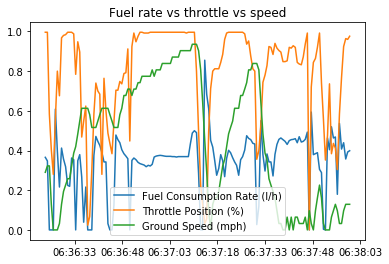

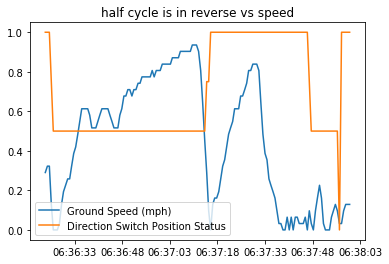

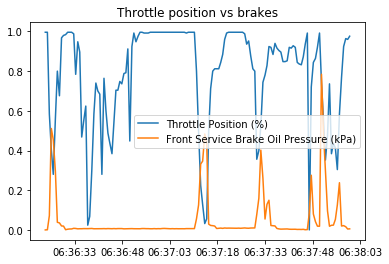

In [281]:
# first best file
df = pd.read_csv(glob.glob(first_best_dir + 'LHDMachineData*')[0])

#convert to date time from GPS time stamp
df['OriginationTime'] = df['OriginationTime'].apply(lambda x:datetime.utcfromtimestamp(x + GPSfromUTC))
df['TransmissionTime'] = df['TransmissionTime'].apply(lambda x:datetime.utcfromtimestamp(x + GPSfromUTC))

# time as index
df = df.set_index('OriginationTime')

# drop some non changing columns
df.drop(df.columns[[1,2,3,4]], axis=1, inplace=True)

# convert states to numeric
df['Neutralize Switch Status'] = df['Neutralize Switch Status'].apply(lambda x: 1 if (x == 'Run') else 0)

switcher = {
    'Forward': 1,
    'Neutral': 0,
    'Reverse': -1,
    'Err-Unknown': -3
}
df['Direction Switch Position Status'] = df['Direction Switch Position Status'].apply(lambda x: switcher.get(x))

on_off_switcher = { 'Off': 0, 'On': 1 }
for on_off_field in [
    'Park Brake Switch Status',
    'Down Shift Switch Status',
    'Up Shift Switch Status',
    'Park Brake Status'
]:
    df[on_off_field] = df[on_off_field].apply(lambda x: on_off_switcher.get(x))
    
gear_switcher = { 'R4': -40, 'R3': -30, 'R2': -20, 'R1': -10,
                'N1': -2, 'N2': 0, 'N3': 2, 'N4': 4,
                'F1': 10, 'F2': 20, 'F3': 30, 'F4': 40}
df['Actual Gear Status'] = df['Actual Gear Status'].apply(lambda x: gear_switcher.get(x))

field = 'Service Brake Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Released') else 0)
field = 'Auto Retard Mode Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Protective') else 0)
field = 'Acceleration Pedal Status'
df[field] = df[field].apply(lambda x: 1 if (x == 'Released') else 0)

# columns of interest
colnames = [
    # throttle related
#     'Throttle Position (%)',                   # 0-100
#     'Engine Speed (rpm)',                      # 658.5-2208
#     'Desired Engine Speed (rpm)',              # 800-2120
#     'Boost Pressure (kPa)',                    # 2.5-129.5
#     'Engine Load Factor (%)',                  # 0-100
#     'Fuel Consumption Rate (l/h)',             # 0-70.8
    
    # next 2 opposite to throttle position
#     'Front Service Brake Oil Pressure (kPa)',  # 0-5331
#     'Rear Service Brake Oil Pressure (kPa)',   # 0-5456

    # speed
#     'Ground Speed (mph)',                      # 0-15.5
#     'Torque Converter Speed (rpm)',            # 0-2302
#     'Transmission Output Speed (rpm)',         # 0-1499
#     'Lockup Clutch Current (%)',               # 0-80
#     'Actual Gear Status',                      # [F2, N2, R2, R1, R3, R4, N4, N3, N1, F1, F3, F4]
    
    # Run for acceleration, Neutral for slowwing
#     'Neutralize Switch Status',                # [Run, Neutral]

    # shows half the cycle in reverse
#     'Direction Switch Position Status',        # [Forward, Neutral, Reverse, Err-Unknown]

    # brake presses
#     'Service Brake Status',                    # [Released, Depressed]
    
    # Acceleration presses
#     'Acceleration Pedal Status',               # [Depressed, Released]
    
    # BORING
    # just on key accel and deccl
#     'Down Shift Switch Status',                # [Off, On]
#     'Up Shift Switch Status',                  # [Off, On]
    # mostly nothing
#     'Auto Retard Mode Status',                 # [Off, Protective]
#     'Park Brake Status',                       # [Off, On]
#     'Park Brake Switch Status',                # [Off, On]
#     'Hydraulic Oil Temperature (degC)',        # 79-87
#     'Fuel Gauge (%)',                          # 69-93
#     'System Voltage (volts)',
]
# relative plot not useful
# df[colnames]['2016-11-11 06:35' : '2016-11-11 06:37'].plot()

from sklearn import preprocessing
def plot_normalized_for(df, title, colnames):
    x = df[colnames]
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=colnames, index=df.index)
    plt.plot(df['2016-11-11 06:35' : '2016-11-11 06:37'])
    plt.title(title)
    plt.legend(labels=colnames)
    plt.show()
    
plot_normalized_for(df, 'Fuel rate vs throttle vs speed',
                    ['Fuel Consumption Rate (l/h)', 'Throttle Position (%)', 'Ground Speed (mph)'])

plot_normalized_for(df, 'half cycle is in reverse vs speed',
                    ['Ground Speed (mph)', 'Direction Switch Position Status'])

plot_normalized_for(df, 'Throttle position vs brakes',
                    ['Throttle Position (%)', 'Front Service Brake Oil Pressure (kPa)'])

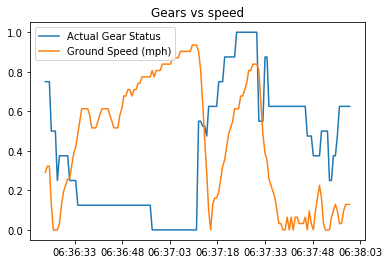

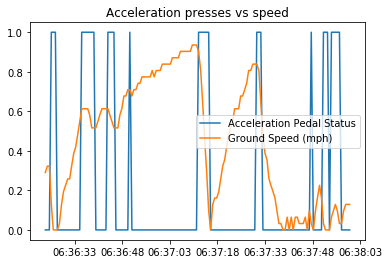

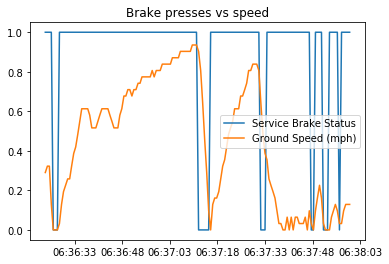

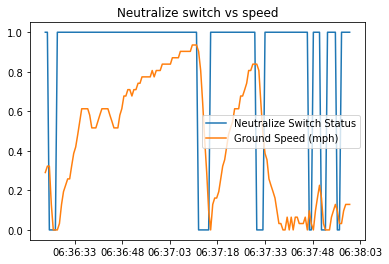

In [282]:
plot_normalized_for(df, 'Gears vs speed',
                    ['Actual Gear Status', 'Ground Speed (mph)'])

plot_normalized_for(df, 'Acceleration presses vs speed',
                    ['Acceleration Pedal Status', 'Ground Speed (mph)'])

plot_normalized_for(df, 'Brake presses vs speed',
                    ['Service Brake Status', 'Ground Speed (mph)'])

plot_normalized_for(df, 'Neutralize switch vs speed',
                    ['Neutralize Switch Status', 'Ground Speed (mph)'])

In [19]:
# This take a long time TODO why?
df_imu = pd.DataFrame()
for name in glob.glob(all_dir + 'LHDIMUData*'):
    dfx = pd.read_csv(name)
    dfx.drop(dfx.columns[[3, 4,5,25]], axis=1, inplace=True)
#     dfx['OriginationTimeStamp'] = dfx['OriginationTime'].apply(lambda x:datetime.utcfromtimestamp(x))
    dfx['OriginationTime'] = pd.to_datetime(dfx['OriginationTime'])
    df_imu = df_imu.append(dfx)

## TODO

- [ ] compare similar routes
- [ ] do some further comparison on similar routes
- [ ] load all the data
- [ ] compare to tonnage data
- [ ] find difference in abilities
- [ ] trilatirate a location from the minetech data